In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option('float_format', '{:f}'.format)

import matplotlib.pyplot as plt
import matplotlib.colors as colors  
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns

from sklearn import metrics 
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import  RobustScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn import linear_model

from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

import time

import collections
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Đồ án/data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0


In [3]:
df = df.drop("Time", axis = 1)

In [4]:
y= df["Class"]
X = df.drop("Class", axis = 1)
y.shape,X.shape

((284807,), (284807, 29))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 29), (56962, 29), (227845,), (56962,))

In [6]:
X_test_saved = X_test.copy()
y_test_saved = y_test.copy()
print("Saved X_test & y_test")

Saved X_test & y_test


In [7]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
scaler = RobustScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

In [8]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt= preprocessing.PowerTransformer(method='yeo-johnson', copy=True)  # creates an instance of the PowerTransformer class.
pt.fit(X_train)

X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)

y_train_pt = y_train
y_test_pt = y_test

In [9]:
# perfom cross validation on the X_train & y_train 
# Initialize StratifiedKFold cross-validator
# perform cross validation
skf = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)
#  Shuffle is False because we need a constant best model when we use GridSearchCV

======================================Logistic Regression Classifier:=======================================
C = 0.1 Penalty = L2
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 1.061500072479248 seconds
Train: [     0      1      2 ... 227842 227843 227844] val: [ 75936  75937  75938 ... 153006 153116 153683]
Time elapsed: 0.8836460113525391 seconds
Train: [     0      1      2 ... 153006 153116 153683] val: [151894 151895 151896 ... 227842 227843 227844]
Time elapsed: 0.9526216983795166 seconds
ROC-AUC Score for val data = 0.9797969874466093
Mean precision val score: 0.885478588591554
Mean recall val score: 0.6295975017349064
Mean f1 val score: 0.7341406860856002
------------------------------------------------------------------------------------------------------------
C = 0.5 Penalty = L2
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 1.0419204235

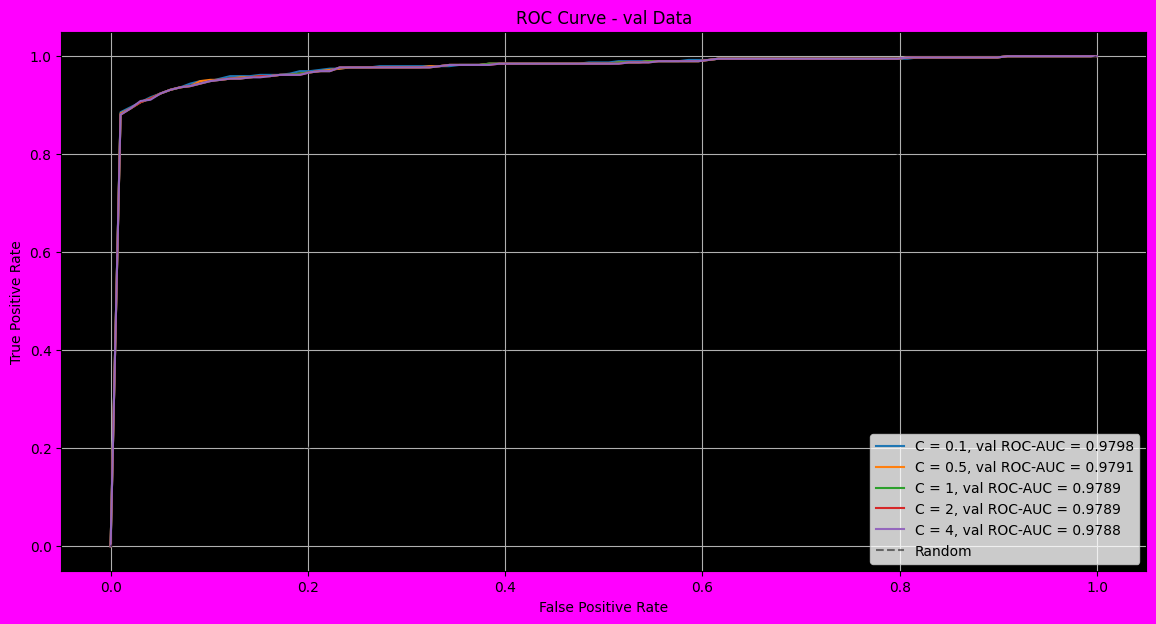

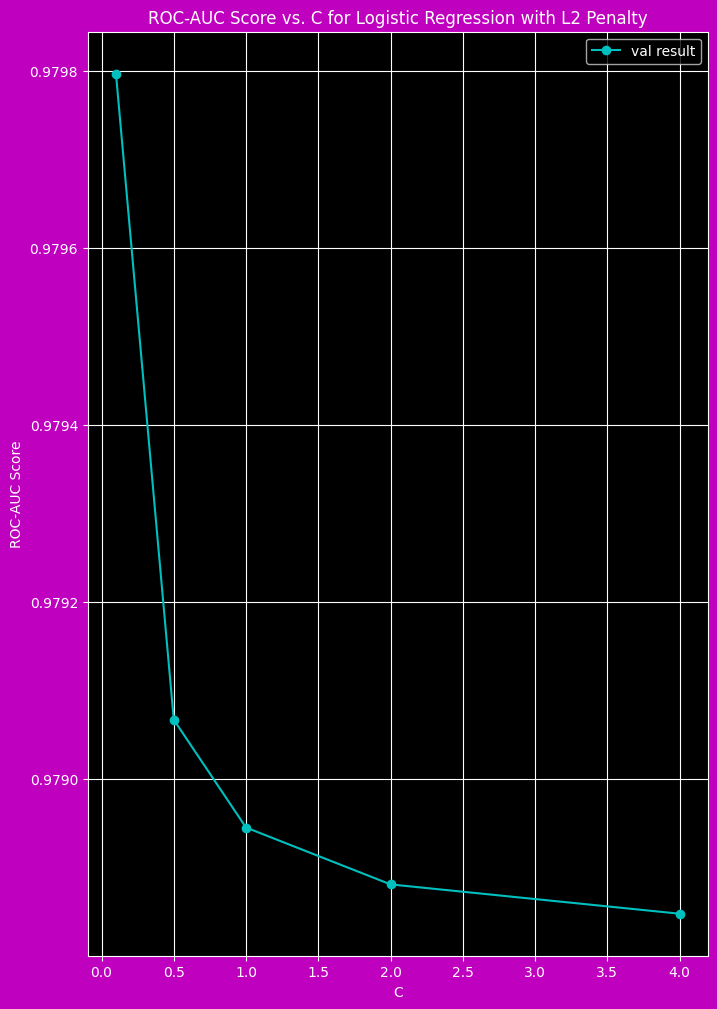





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of C: 
 [0.9797969874466093, 0.9790668817700007, 0.9789450373956186, 0.9788807735548114, 0.9788476359347289]
Best C: 0.1
Best Mean ROC-AUC score for val data: 0.9797969874466093
Mean precision val score for best C 0.885478588591554
Mean recall val score for best C 0.6295975017349064
Mean f1 val score for best C 0.7341406860856002




In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp

print("============================================================================================================")

print("======================================Logistic Regression Classifier:=======================================")

# Define your values of C
C_values = [0.1, 0.5, 1, 2, 4]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for train and val data
mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig, ax2= plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background
# Set background color for subplots
ax2.set_facecolor('black')

# Loop through each value of C
for c in C_values:
    print("C =", c, "Penalty = L2")
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation    
    for train_index, val_index in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]

        logreg_classifier = linear_model.LogisticRegression(penalty='l2', C=c)
        logreg_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = logreg_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)


        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)

        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))


        # precision_val.append(precision_score(y_val_cv, y_val_pred))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")
        
    # Calculate mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)

    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of C
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='C = ' + str(c) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("===============================Logistic Regression Has Run Successfully:====================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for random classifier
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Set labels and title for ROC curves
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(C_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('C')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. C for Logistic Regression with L2 Penalty')
    # plt.xscale('log')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for train and val data for all values of C
print("Mean ROC-AUC scores for val data for all values of C: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_c = C_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best C:", best_c)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("Mean precision val score for best C", mean_precision_scores_val[best_index])
print("Mean recall val score for best C", mean_recall_scores_val[best_index])
print("Mean f1 val score for best C", mean_f1_scores_val[best_index])

print("============================================================================================================")
print("\n")
print("============================================================================================================")

In [11]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression parameters for Stratified K-fold cross vaidation
"""
This code performs hyperparameter tuning using K-fold cross-validation for logistic regression. 
The parameter grid being searched is defined in params, with C being the regularization parameter for logistic regression. 
folds is an object that defines how many folds should be used in cross-validation.
"""

params = {"C": [0.01, 0.1, 0.5], 'penalty': ['l1', 'l2']}

# Define the logistic regression classifier
logreg_classifier = linear_model.LogisticRegression()

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(logreg_classifier,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        pre_dispatch = 6, # prevents explosion of consumption of memory
                        return_train_score=True) 
# Fit the GridSearchCV object and perform hyperparameter tuning
model_GridSearch.fit(X_train_pt, y_train_pt)


end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Time taken: 9.87 seconds
Best ROC AUC score:  0.9812052138770543
Best hyperparameters:  {'C': 0.01, 'penalty': 'l2'}


In [12]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 0.9812052138770543
{'C': 0.1, 'penalty': 'l1'} nan
{'C': 0.1, 'penalty': 'l2'} 0.9797969874466093
{'C': 0.5, 'penalty': 'l1'} nan
{'C': 0.5, 'penalty': 'l2'} 0.9790668817700007

Rank of each hyperparameter combination:
1 {'C': 0.01, 'penalty': 'l1'}
2 {'C': 0.01, 'penalty': 'l2'}
3 {'C': 0.1, 'penalty': 'l1'}
4 {'C': 0.1, 'penalty': 'l2'}
5 {'C': 0.5, 'penalty': 'l1'}
6 {'C': 0.5, 'penalty': 'l2'}

Standard deviation of test scores:
{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 0.007670919641509045
{'C': 0.1, 'penalty': 'l1'} nan
{'C': 0.1, 'penalty': 'l2'} 0.009179067053040193
{'C': 0.5, 'penalty': 'l1'} nan
{'C': 0.5, 'penalty': 'l2'} 0.009651062780020628


In [13]:

from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

best_model = model_GridSearch.best_estimator_
# Predict probabilities for the test set
y_test_pred_proba = best_model.predict_proba(X_test_pt)[:, 1]

# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
y_test_pred = (y_test_pred_proba >= 0.5).astype(int)

# Calculate the ROC-AUC score
test_roc_auc = roc_auc_score(y_test_pt, y_test_pred_proba)

# Calculate other metrics using binary predictions
test_f1_score = f1_score(y_test_pt, y_test_pred)
test_precision = precision_score(y_test_pt, y_test_pred)
test_recall = recall_score(y_test_pt, y_test_pred)

print("Test ROC-AUC Score:", test_roc_auc)
print("Test F1 Score:", test_f1_score)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)

Test ROC-AUC Score: 0.9738807523572176
Test F1 Score: 0.7209302325581396
Test Precision: 0.8378378378378378
Test Recall: 0.6326530612244898


In [20]:
import numpy as np
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from scipy.special import expit

# Giả sử bạn đã có best_model và X_test_pt, y_test_pt
# Ví dụ:
# best_model = LogisticRegression()
# best_model.fit(X_train_pt, y_train_pt) # Giả sử X_train_pt, y_train_pt đã được định nghĩa
# X_test_pt = np.random.rand(100, 10) # 100 mẫu, 10 features
# y_test_pt = np.random.randint(0, 2, 100) # 100 nhãn 0 hoặc 1

# Chọn index của dòng dữ liệu bạn muốn kiểm tra
index_to_predict = 840  # Thay đổi số này để chọn dòng khác

# Lấy dòng dữ liệu từ X_test_pt
single_data_point = X_test_pt[index_to_predict].reshape(1, -1)

# Dự đoán xác suất cho dòng dữ liệu (sử dụng decision_function và sigmoid)
single_decision_value = best_model.decision_function(single_data_point)
single_pred_proba = expit(single_decision_value)[0]

# Chuyển xác suất thành dự đoán nhị phân
single_pred = (single_pred_proba >= 0.5).astype(int)

# Lấy nhãn thực tế tương ứng
true_label = 1

# In kết quả
print(f"  Kết quả dự đoán của Logistic Regression:")
print(f"  Thuộc tính của dữ liệu thử nghiệm: {X_test_pt[index_to_predict][:5]}")
print(f"  Xác suất dự đoán: {single_pred_proba[]:.4f}")
print(f"  Nhãn thực tế: {true_label}")
print(f"  Dự đoán: {single_pred}")

  Kết quả dự đoán của Logistic Regression:
  Thuộc tính của dữ liệu thử nghiệm: [-0.87009612  1.80395146 -1.68519874  1.54698182 -0.99316979]
  Xác suất dự đoán: 0.5728
  Nhãn thực tế: 1
  Dự đoán: 1


============================================KNN Classifier:===============================================
K = 3
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 75.97121787071228 seconds
Train: [     0      1      2 ... 227842 227843 227844] val: [ 75936  75937  75938 ... 153006 153116 153683]
Time elapsed: 78.6613142490387 seconds
Train: [     0      1      2 ... 153006 153116 153683] val: [151894 151895 151896 ... 227842 227843 227844]
Time elapsed: 71.62985277175903 seconds
Mean ROC-AUC for train data: 0.9999479085933528
Mean ROC-AUC for val data: 0.9110686212594891
------------------------------------------------------------------------------------------------------------
K = 5
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 68.44408845901489 seconds
Train: [     0      1      2 ... 227842 227843 227844] val: [ 75936  75937  75938 ... 153006 153116

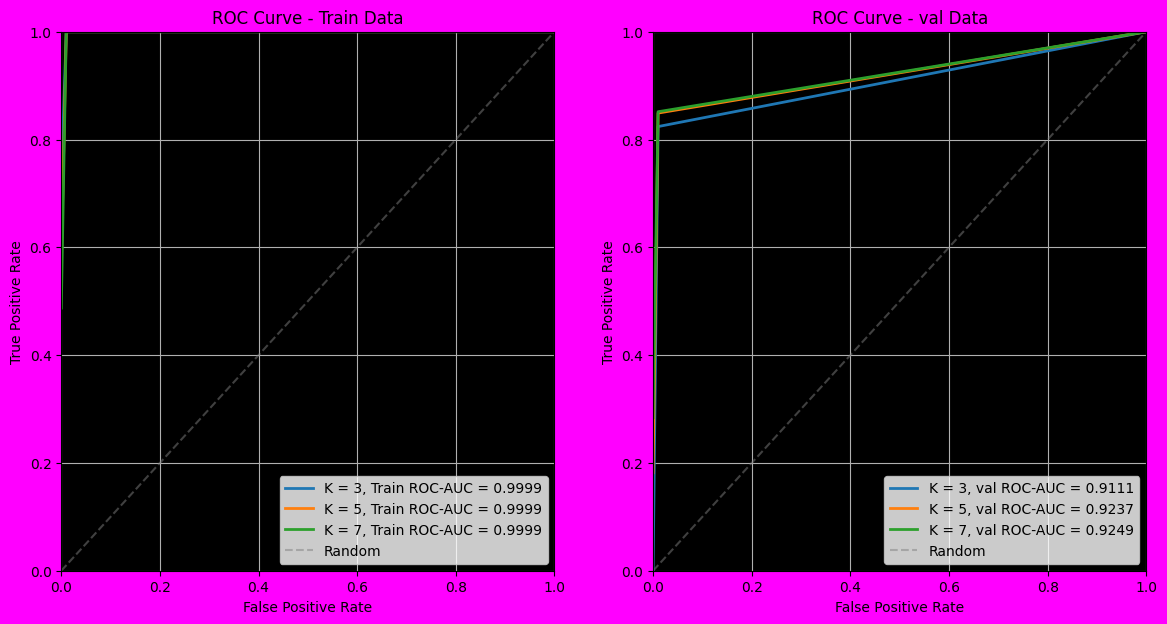

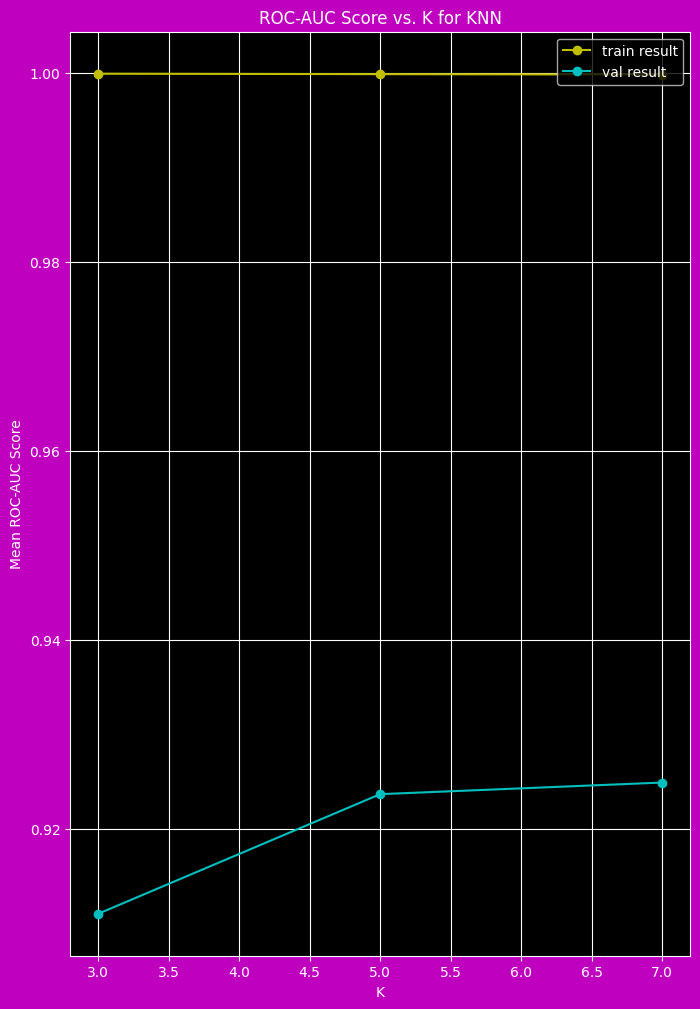





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for train data for all values of K: 
 [0.9999479085933528, 0.9999030150193778, 0.9998607640754523]
Mean ROC-AUC scores for val data for all values of K: 
 [0.9110686212594891, 0.9237188714312442, 0.9249482980359366]
Best K: 7
Best Mean ROC-AUC score for val data: 0.9249482980359366




In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from scipy import interp
import time

print("==========================================================================================================")

print("============================================KNN Classifier:===============================================")

# Define your values of K (number of neighbors)
K_values = [3, 5, 7]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for train and val data
mean_roc_auc_scores_train = []
mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

# Create subplots for ROC curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background
# Set background color for subplots
ax1.set_facecolor('black')
ax2.set_facecolor('black')

# Define the KFold object
# skf = KFold(n_splits=3, shuffle=False, random_state=42)

# Loop through each value of K
for k in K_values:
    print("K =", k)
    cv_scores_train = []
    cv_scores_val = []
    fprs_train = []
    tprs_train = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation
    for train_index, val_index in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]

        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        knn_classifier.fit(X_train_cv, y_train_cv)

        y_train_pred = knn_classifier.predict_proba(X_train_cv)
        train_score = roc_auc_score(y_true=y_train_cv, y_score=y_train_pred[:, 1])
        cv_scores_train.append(train_score)

        y_val_pred = knn_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_train, tpr_train, _ = roc_curve(y_true=y_train_cv, y_score=y_train_pred[:, 1])
        tprs_train.append(interp(mean_fpr, fpr_train, tpr_train))
        tprs_train[-1][0]

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0]

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculate mean ROC-AUC scores and mean false positive rates for train and val data
    mean_roc_auc_train = np.mean(cv_scores_train)
    mean_roc_auc_scores_train.append(mean_roc_auc_train)
    mean_tpr_train = np.mean(tprs_train, axis=0)
    mean_fpr_train = mean_fpr
    ax1.plot(mean_fpr_train, mean_tpr_train, linestyle='-', lw=2, label='K = ' + str(k) + ', Train ROC-AUC = ' + str(round(mean_roc_auc_train, 4)).format(k))

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)
    mean_tpr_val = np.mean(tprs_val, axis=0)
    mean_fpr_val = mean_fpr
    ax2.plot(mean_fpr_val, mean_tpr_val, linestyle='-', lw=2, label='K = ' + str(k) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)).format(k))

    print("Mean ROC-AUC for train data:", mean_roc_auc_train)
    print("Mean ROC-AUC for val data:", mean_roc_auc_val)


    print("------------------------------------------------------------------------------------------------------------")

print("=================================KNN Classifier Has Run Successfully:=======================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")

# Plot ROC curves for train and val data
ax1.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random', alpha=0.5)
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve - Train Data')
ax1.legend(loc='lower right')
ax1.grid(True)  # Add grid to the plot

ax2.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random', alpha=0.5)
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc='lower right')
ax2.grid(True)  # Add grid to the plot

plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(K_values, mean_roc_auc_scores_train, 'yo-')
    plt.plot(K_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('K')
    plt.ylabel('Mean ROC-AUC Score')
    plt.title('ROC-AUC Score vs. K for KNN')
    # plt.xscale('log')
    plt.legend(['train result', 'val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for train and val data for all values of K
print("Mean ROC-AUC scores for train data for all values of K: \n", mean_roc_auc_scores_train)
print("Mean ROC-AUC scores for val data for all values of K: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_k = K_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best K:", best_k) 
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)



print("============================================================================================================")
print("\n")
print("============================================================================================================")

In [29]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression parameters for Stratified K-fold cross vaidation
"""
This code performs hyperparameter tuning using K-fold cross-validation for logistic regression. 
The parameter grid being searched is defined in params, with C being the regularization parameter for logistic regression. 
folds is an object that defines how many folds should be used in cross-validation.
"""

# Define the parameter grid for KNN
params = {'n_neighbors': [5], 'metric': ['euclidean']}
# params = {'n_neighbors': [5, 7, 9], 'metric': ['manhattan']}

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(knn_classifier,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        pre_dispatch = 6, # prevents explosion of consumption of memory
                        return_train_score=True) 
# Fit the GridSearchCV object and perform hyperparameter tuning
model_GridSearch.fit(X_train_pt, y_train_pt)


end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Time taken: 238.01 seconds
Best ROC AUC score:  0.9237188714312442
Best hyperparameters:  {'metric': 'euclidean', 'n_neighbors': 5}


In [30]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'metric': 'euclidean', 'n_neighbors': 5} 0.9237188714312442

Rank of each hyperparameter combination:
1 {'metric': 'euclidean', 'n_neighbors': 5}

Standard deviation of test scores:
{'metric': 'euclidean', 'n_neighbors': 5} 0.008173267654223946


In [31]:

from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

best_model = model_GridSearch.best_estimator_
# Predict probabilities for the test set
y_test_pred_proba = best_model.predict_proba(X_test_pt)[:, 1]

# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
y_test_pred = (y_test_pred_proba >= 0.5).astype(int)

# Calculate the ROC-AUC score
test_roc_auc = roc_auc_score(y_test_pt, y_test_pred_proba)

# Calculate other metrics using binary predictions
test_f1_score = f1_score(y_test_pt, y_test_pred)
test_precision = precision_score(y_test_pt, y_test_pred)
test_recall = recall_score(y_test_pt, y_test_pred)

print("Test ROC-AUC Score:", test_roc_auc)
print("Test F1 Score:", test_f1_score)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)

Test ROC-AUC Score: 0.948860349218472
Test F1 Score: 0.8351648351648353
Test Precision: 0.9047619047619048
Test Recall: 0.7755102040816326


In [34]:
import numpy as np
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

# Giả sử bạn đã có best_model và X_test_pt, y_test_pt
# Ví dụ:
# best_model = DecisionTreeClassifier()
# best_model.fit(X_train_pt, y_train_pt) # Giả sử X_train_pt, y_train_pt đã được định nghĩa
# X_test_pt = np.random.rand(100, 10) # 100 mẫu, 10 features
# y_test_pt = np.random.randint(0, 2, 100) # 100 nhãn 0 hoặc 1

# Chọn index của dòng dữ liệu bạn muốn kiểm tra
index_to_predict = 840  # Thay đổi số này để chọn dòng khác

# Lấy dòng dữ liệu từ X_test_pt
single_data_point = X_test_pt[index_to_predict].reshape(1, -1)

# Dự đoán xác suất cho dòng dữ liệu
single_pred_proba = best_model.predict_proba(single_data_point)[:, 1]

# Chuyển xác suất thành dự đoán nhị phân
single_pred = (single_pred_proba >= 0.5).astype(int)[0]

# Lấy nhãn thực tế tương ứng
true_label = 1

# In kết quả
print(f"  Kết quả dự đoán của KNN:")
print(f"  Giá trị thuộc tính: {X_test_pt[index_to_predict][:5]}")
print(f"  Xác suất dự đoán: {single_pred_proba[0]:.4f}")
print(f"  Nhãn thực tế: {true_label}")
print(f"  Dự đoán: {single_pred}")

  Kết quả dự đoán của KNN:
  Giá trị thuộc tính: [-0.87009612  1.80395146 -1.68519874  1.54698182 -0.99316979]
  Xác suất dự đoán: 0.8000
  Nhãn thực tế: 1
  Dự đoán: 1


==============================================Decision Tree:================================================
Max Depth = 1
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 1.8112468719482422 seconds
Train: [     0      1      2 ... 227842 227843 227844] val: [ 75936  75937  75938 ... 153006 153116 153683]
Time elapsed: 1.340937614440918 seconds
Train: [     0      1      2 ... 153006 153116 153683] val: [151894 151895 151896 ... 227842 227843 227844]
Time elapsed: 1.3212347030639648 seconds
ROC-AUC Score for val data = 0.8260369152950421
Mean precision val score: 0.7687499999999999
Mean recall val score: 0.6524211581463489
Mean f1 val score: 0.7037697164558141
------------------------------------------------------------------------------------------------------------
Max Depth = 2
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 2.5046918392181396 second

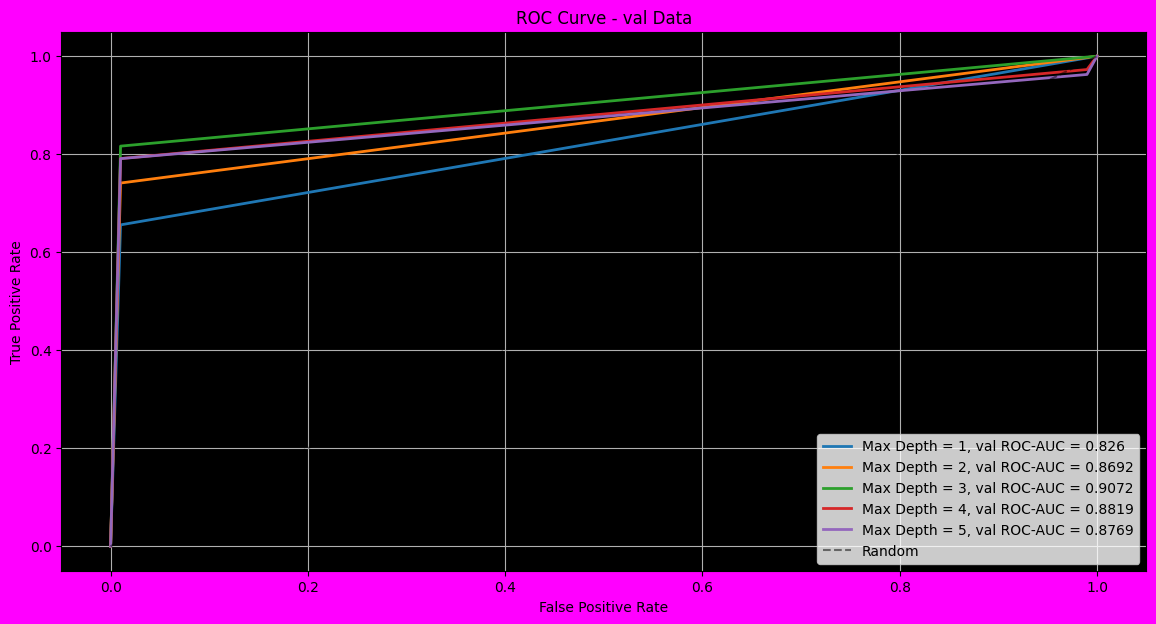

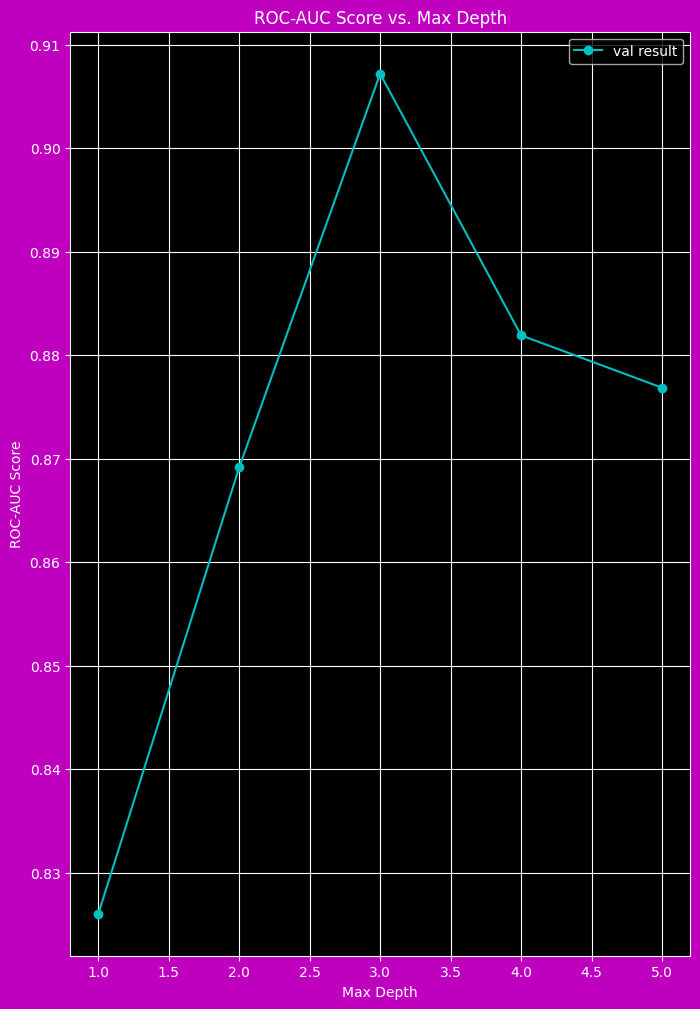





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of Max Depth: 
 [0.8260369152950421, 0.869181657800751, 0.9072074172906813, 0.8819280351149047, 0.8768688120936156]
Best Max Depth: 3
Best Mean ROC-AUC score for val data: 0.9072074172906813
Mean precision val score for best C 0.8293379738051869
Mean recall val score for best C 0.7183090446449225
Mean f1 val score for best C 0.7692937154692389




In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp

print("============================================================================================================")

print("==============================================Decision Tree:================================================")


# Define your values of max_depth
max_depth_values = [1, 2, 3, 4, 5]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2= plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background
# Set background color for subplots
ax2.set_facecolor('black')

# Loop through each value of max_depth
for max_depth in max_depth_values:
    print("Max Depth =", max_depth)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []


    # Perform cross-validation
    for train_index, val_index in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]

        # Create a decision tree classifier with the specified max_depth value
        dt_classifier = DecisionTreeClassifier(max_depth=max_depth)
        dt_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = dt_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)
        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculate mean ROC-AUC scores for val data
    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of C
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='Max Depth = ' + str(max_depth) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("==================================Decision Tree Has Run Successfully:======================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for random classifier
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Set labels and title for ROC curves
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(max_depth_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('Max Depth')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. Max Depth')
    # plt.xscale('log')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for val data for all values of Max Depth
print("Mean ROC-AUC scores for val data for all values of Max Depth: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_max_depth = max_depth_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best Max Depth:", best_max_depth)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("Mean precision val score for best C", mean_precision_scores_val[best_index])
print("Mean recall val score for best C", mean_recall_scores_val[best_index])
print("Mean f1 val score for best C", mean_f1_scores_val[best_index])


print("============================================================================================================")
print("\n")
print("============================================================================================================")

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import time

# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the parameters to be tuned
params = {'max_depth': [2],
          'min_samples_split': [2],
          'min_samples_leaf': [1],
          'criterion': ['gini']}

# Create a GridSearchCV object with stratified cross-validation
start_time = time.time()
model_GridSearch = GridSearchCV(dt_classifier,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True) 
 
# Fit the GridSearchCV object and perform hyperparameter tuning
model_GridSearch.fit(X_train_pt, y_train_pt)

end_time = time.time()

# Print the time taken to fit the model
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing an evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Time taken: 11.43 seconds
Best ROC AUC score:  0.869181657800751
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [24]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2} 0.869181657800751

Rank of each hyperparameter combination:
1 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

Standard deviation of test scores:
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2} 0.014361039436164518


In [25]:

from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

best_model = model_GridSearch.best_estimator_
# Predict probabilities for the test set
y_test_pred_proba = best_model.predict_proba(X_test_pt)[:, 1]

# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
y_test_pred = (y_test_pred_proba >= 0.5).astype(int)

# Calculate the ROC-AUC score
test_roc_auc = roc_auc_score(y_test_pt, y_test_pred_proba)

# Calculate other metrics using binary predictions
test_f1_score = f1_score(y_test_pt, y_test_pred)
test_precision = precision_score(y_test_pt, y_test_pred)
test_recall = recall_score(y_test_pt, y_test_pred)

print("Test ROC-AUC Score:", test_roc_auc)
print("Test F1 Score:", test_f1_score)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)

Test ROC-AUC Score: 0.8824332384895432
Test F1 Score: 0.7653061224489794
Test Precision: 0.7653061224489796
Test Recall: 0.7653061224489796


In [27]:
# Chọn index của dòng dữ liệu bạn muốn kiểm tra
index_to_predict = 840 
# Lấy dòng dữ liệu từ X_test_pt
single_data_point = X_test_pt[index_to_predict].reshape(1, -1)
# Dự đoán xác suất cho dòng dữ liệu
single_pred_proba = best_model.predict_proba(single_data_point)[:, 1]
# Chuyển xác suất thành dự đoán nhị phân
single_pred = (single_pred_proba >= 0.5).astype(int)[0]
# Lấy nhãn thực tế tương ứng
true_label = 1
# In kết quả
print(f"  Kết quả dự đoán của cây quyết định:")
print(f"  Giá trị thuộc tính: {X_test_pt[index_to_predict][:5]}")
print(f"  Xác suất dự đoán: {single_pred_proba[0]:.4f}")
print(f"  Nhãn thực tế: {true_label}")
print(f"  Dự đoán: {single_pred}")

  Kết quả dự đoán của cây quyết định:
  Giá trị thuộc tính: [-0.87009612  1.80395146 -1.68519874  1.54698182 -0.99316979]
  Xác suất dự đoán: 0.8349
  Nhãn thực tế: 1
  Dự đoán: 1


================================================Random Forest:==============================================
n_estimators = 10
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 26.845434188842773 seconds
Train: [     0      1      2 ... 227842 227843 227844] val: [ 75936  75937  75938 ... 153006 153116 153683]
Time elapsed: 25.45841407775879 seconds
Train: [     0      1      2 ... 153006 153116 153683] val: [151894 151895 151896 ... 227842 227843 227844]
Time elapsed: 24.76010012626648 seconds
ROC-AUC Score for train data = 0.9999988335797297
ROC-AUC Score for val data = 0.9209435959400367
------------------------------------------------------------------------------------------------------------
n_estimators = 50
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 130.76696848869324 seconds
Train: [     0      1      2 ... 227842 227843 227844] val: [ 7593

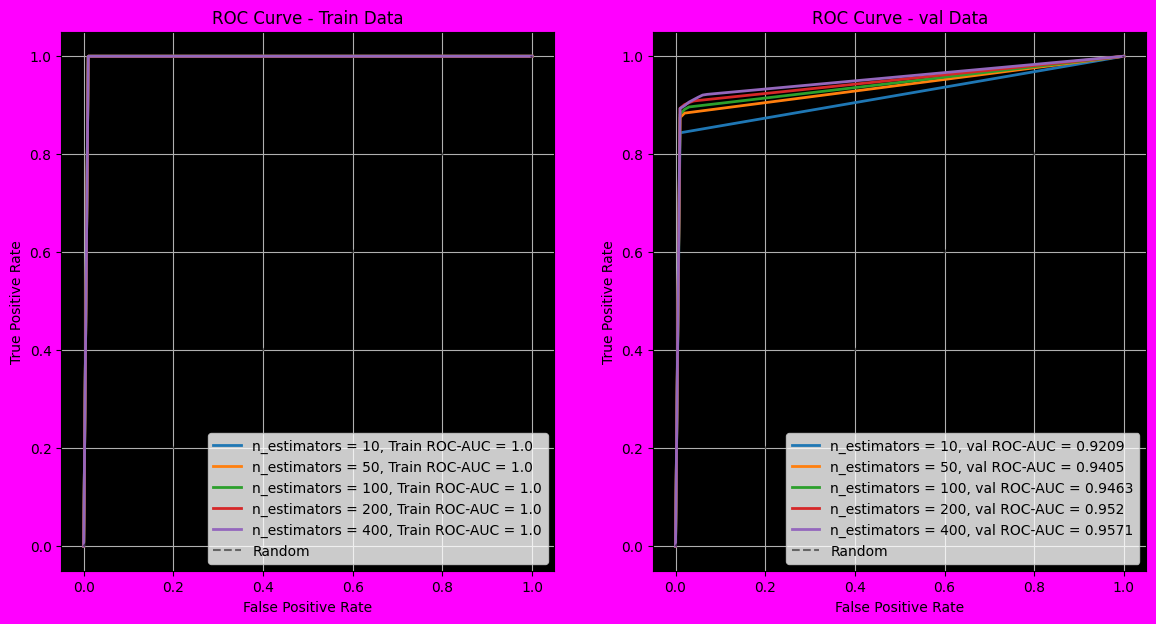

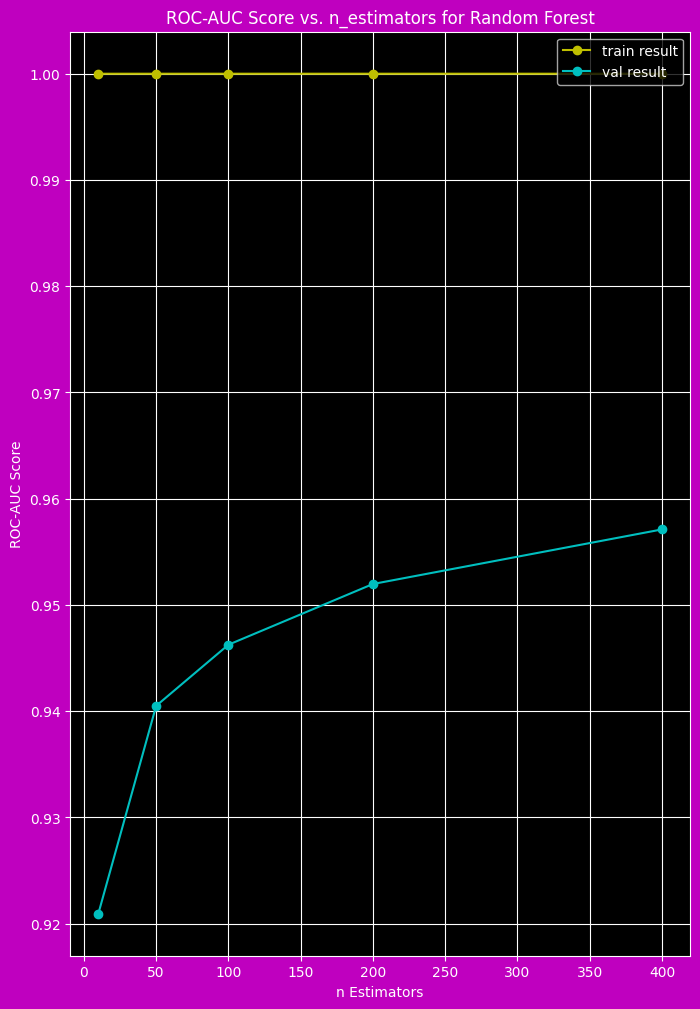





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for train data for all values of n Estimators: 
 [0.9999988335797297, 1.0, 1.0, 1.0, 1.0]
Mean ROC-AUC scores for val data for all values of n Estimators: 
 [0.9209435959400367, 0.9405065114761131, 0.9462595426915575, 0.95197509223892, 0.9571120293648786]
Best n Estimators: 400
Best Mean ROC-AUC score for val data: 0.9571120293648786




In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
from sklearn.ensemble import RandomForestClassifier




print("============================================================================================================")

print("================================================Random Forest:==============================================")

# Define your values of n_estimators
n_values = [10, 50, 100, 200, 400]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for train and val data
mean_roc_auc_scores_train = []
mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background
# Set background color for subplots
ax1.set_facecolor('black')
ax2.set_facecolor('black')


# Loop through each value of n_estimators
for n in n_values:
    print("n_estimators =", n)
    cv_scores_train = []
    cv_scores_val = []
    fprs_train = []
    tprs_train = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation
    for train_index, val_index in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]

        rf_classifier = RandomForestClassifier(n_estimators=n)
        rf_classifier.fit(X_train_cv, y_train_cv)

        y_train_pred = rf_classifier.predict_proba(X_train_cv)
        train_score = roc_auc_score(y_true=y_train_cv, y_score=y_train_pred[:, 1])
        cv_scores_train.append(train_score)

        y_val_pred = rf_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_train, tpr_train, _ = roc_curve(y_true=y_train_cv, y_score=y_train_pred[:, 1])
        tprs_train.append(interp(mean_fpr, fpr_train, tpr_train))
        tprs_train[-1][0] = 0.0
        fprs_train.append(fpr_train)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")
        
    # Calculate mean ROC-AUC scores for train and val data
    mean_roc_auc_train = np.mean(cv_scores_train)
    mean_roc_auc_scores_train.append(mean_roc_auc_train)

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    print("ROC-AUC Score for train data =", mean_roc_auc_train)
    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of C
    ax1.plot(mean_fpr, np.mean(tprs_train, axis=0), linestyle='-', lw=2, label='n_estimators = ' + str(n) + ', Train ROC-AUC = ' + str(round(mean_roc_auc_train, 4)))
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='n_estimators = ' + str(n) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("=================================Random Forest Has Run Successfully:========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for random classifier
ax1.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Set labels and title for ROC curves
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve - Train Data')
ax1.legend(loc="lower right")
ax1.grid(True)  # Add grid to the plot

ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(n_values, mean_roc_auc_scores_train, 'yo-')
    plt.plot(n_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('n Estimators')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. n_estimators for Random Forest')
    # plt.xscale('log')
    plt.legend(['train result', 'val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for train and val data for all values of n Estimators
print("Mean ROC-AUC scores for train data for all values of n Estimators: \n", mean_roc_auc_scores_train)
print("Mean ROC-AUC scores for val data for all values of n Estimators: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_n_estimators = n_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best n Estimators:", best_n_estimators)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)



print("============================================================================================================")
print("\n")
print("============================================================================================================")

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameters grid for tuning
params = {
    "n_estimators": [500],
    "min_samples_split": [5],
    }

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(rf_classifier,
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1,
                        verbose=1,
                        # pre_dispatch=6, 
                        return_train_score=True)

# Fit the GridSearchCV object and perform hyperparameter tuning
model_GridSearch.fit(X_train_pt, y_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Time taken: 4203.04 seconds
Best ROC AUC score:  0.9611591353492956
Best hyperparameters:  {'min_samples_split': 5, 'n_estimators': 500}


In [36]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'min_samples_split': 5, 'n_estimators': 500} 0.9611591353492956

Rank of each hyperparameter combination:
1 {'min_samples_split': 5, 'n_estimators': 500}

Standard deviation of test scores:
{'min_samples_split': 5, 'n_estimators': 500} 0.010738553921015694


In [25]:

from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

best_model = model_GridSearch.best_estimator_
# Predict probabilities for the test set
y_test_pred_proba = best_model.predict_proba(X_test_pt)[:, 1]

# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
y_test_pred = (y_test_pred_proba >= 0.5).astype(int)

# Calculate the ROC-AUC score
test_roc_auc = roc_auc_score(y_test_pt, y_test_pred_proba)

# Calculate other metrics using binary predictions
test_f1_score = f1_score(y_test_pt, y_test_pred)
test_precision = precision_score(y_test_pt, y_test_pred)
test_recall = recall_score(y_test_pt, y_test_pred)

print("Test ROC-AUC Score:", test_roc_auc)
print("Test F1 Score:", test_f1_score)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)

Test ROC-AUC Score: 0.9650608361662054
Test F1 Score: 0.8743169398907105
Test Precision: 0.9411764705882353
Test Recall: 0.8163265306122449


In [39]:
import numpy as np
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

# Giả sử bạn đã có best_model và X_test_pt, y_test_pt
# Ví dụ:
# best_model = DecisionTreeClassifier()
# best_model.fit(X_train_pt, y_train_pt) # Giả sử X_train_pt, y_train_pt đã được định nghĩa
# X_test_pt = np.random.rand(100, 10) # 100 mẫu, 10 features
# y_test_pt = np.random.randint(0, 2, 100) # 100 nhãn 0 hoặc 1

# Chọn index của dòng dữ liệu bạn muốn kiểm tra
index_to_predict = 840  # Thay đổi số này để chọn dòng khác

# Lấy dòng dữ liệu từ X_test_pt
single_data_point = X_test_pt[index_to_predict].reshape(1, -1)

# Dự đoán xác suất cho dòng dữ liệu
single_pred_proba = best_model.predict_proba(single_data_point)[:, 1]

# Chuyển xác suất thành dự đoán nhị phân
single_pred = (single_pred_proba >= 0.5).astype(int)[0]

# Lấy nhãn thực tế tương ứng
true_label = 1

# In kết quả
print(f"  Kết quả dự đoán của Random Forest:")
print(f"  Giá trị thuộc tính: {X_test_pt[index_to_predict][:5]}")
print(f"  Xác suất dự đoán: {single_pred_proba[0]:.4f}")
print(f"  Nhãn thực tế: {true_label}")
print(f"  Dự đoán: {single_pred}")

  Kết quả dự đoán của Random Forest:
  Giá trị thuộc tính: [-0.87009612  1.80395146 -1.68519874  1.54698182 -0.99316979]
  Xác suất dự đoán: 0.8000
  Nhãn thực tế: 1
  Dự đoán: 1
